<a href="https://colab.research.google.com/github/MR-Sambit/Crop-Disease-Detection-using-Al_ML_v2.0/blob/main/CropDieaseDetection_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

# Upload your kaggle.json file
from google.colab import files
files.upload()

# Make a directory named kaggle and copy kaggle.json file there.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permission of the file.
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset from kaggle.


Saving kaggle.json to kaggle.json


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmarex/plantdisease")

print("Path to dataset files:", path)

100%|██████████| 658M/658M [00:07<00:00, 93.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage/

Pepper__bell___Bacterial_spot  Tomato_Bacterial_spot  Tomato_Septoria_leaf_spot
Pepper__bell___healthy	       Tomato_Early_blight    Tomato_Spider_mites_Two_spotted_spider_mite
Potato___Early_blight	       Tomato_healthy	      Tomato__Target_Spot
Potato___healthy	       Tomato_Late_blight     Tomato__Tomato_mosaic_virus
Potato___Late_blight	       Tomato_Leaf_Mold       Tomato__Tomato_YellowLeaf__Curl_Virus


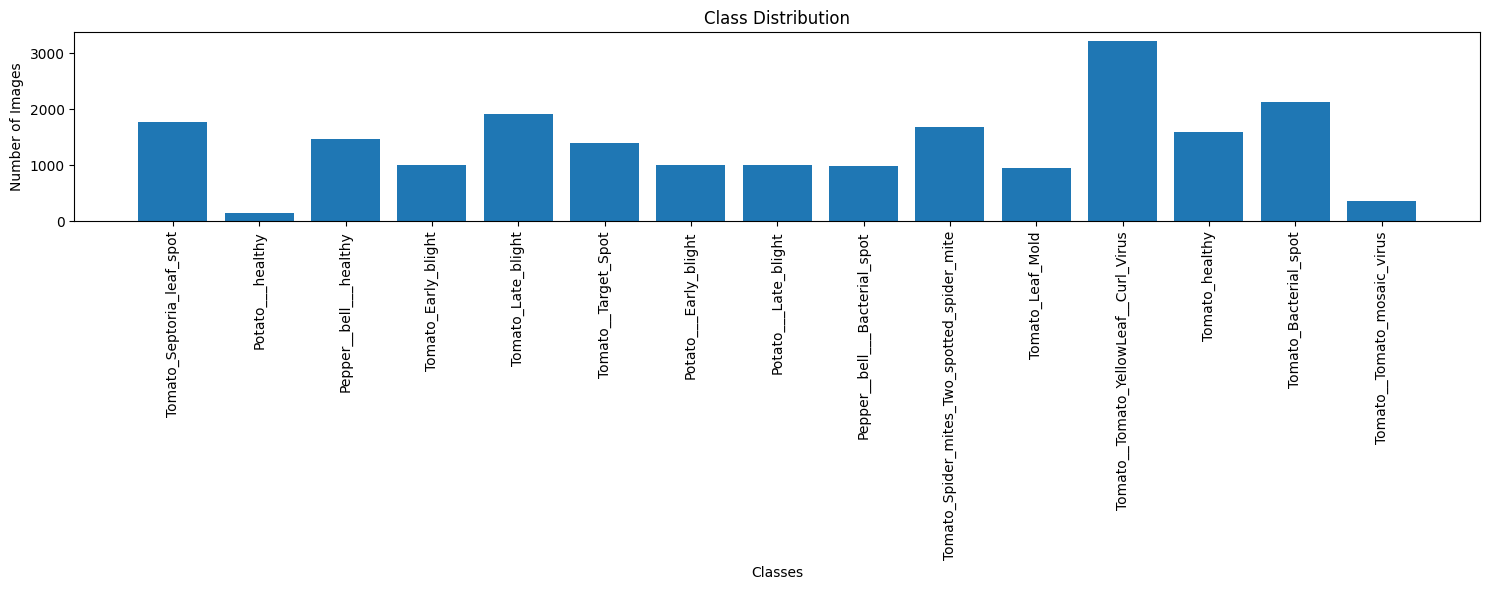

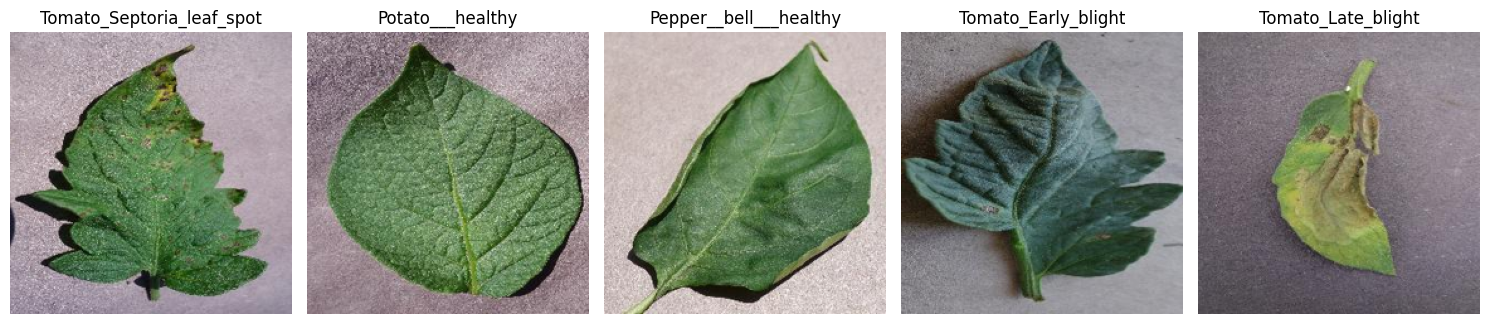

Total number of classes: 15
Total number of images: 20639


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Set the path to your dataset
dataset_path = "/root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage"

# Function to load and preprocess images
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img = np.array(img) / 255.0  # Normalize pixel values
    return img

# Get list of all subdirectories (classes)
classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# Count images in each class
class_counts = {}
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    class_counts[cls] = len(os.listdir(class_path))

# Plot class distribution
plt.figure(figsize=(15, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

# Display sample images
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes[:5]):  # Display samples from first 5 classes
    class_path = os.path.join(dataset_path, cls)
    sample_image_path = os.path.join(class_path, os.listdir(class_path)[0])
    img = load_and_preprocess_image(sample_image_path)

    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Total number of classes: {len(classes)}")
print(f"Total number of images: {sum(class_counts.values())}")

In [18]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split
# import numpy as np
# import os
# import shutil

# # Set the path to your dataset
# dataset_path = "/root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage"
# output_path = "/tmp/plant_disease_dataset/"

# # Parameters
# img_height, img_width = 224, 224
# batch_size = 32

# # Get list of all subdirectories (classes)
# classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

# # Create dictionaries to map class names to integers and vice versa
# class_to_index = {cls: i for i, cls in enumerate(classes)}
# index_to_class = {i: cls for cls, i in class_to_index.items()}

# # Collect all image paths and labels
# all_image_paths = []
# all_labels = []

# for cls in classes:
#     class_path = os.path.join(dataset_path, cls)
#     for img_name in os.listdir(class_path):
#         img_path = os.path.join(class_path, img_name)
#         all_image_paths.append(img_path)
#         all_labels.append(class_to_index[cls])

# # Split the data into train+validation and test sets
# train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
#     all_image_paths, all_labels, test_size=0.2, stratify=all_labels, random_state=42
# )

# # Further split train+validation into train and validation sets
# train_paths, val_paths, train_labels, val_labels = train_test_split(
#     train_val_paths, train_val_labels, test_size=0.2, stratify=train_val_labels, random_state=42
# )

# # Function to copy images to new directory structure
# def copy_images(image_paths, labels, subset):
#     for img_path, label in zip(image_paths, labels):
#         cls = index_to_class[label]
#         dest_dir = os.path.join(output_path, subset, cls)
#         os.makedirs(dest_dir, exist_ok=True)
#         shutil.copy(img_path, dest_dir)

# # Create new directory structure
# copy_images(train_paths, train_labels, "train")
# copy_images(val_paths, val_labels, "validation")
# copy_images(test_paths, test_labels, "test")

# # Create data generators
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# val_test_datagen = ImageDataGenerator(rescale=1./255)

# # Create data generators
# train_generator = train_datagen.flow_from_directory(
#     os.path.join(output_path, "train"),
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=True
# )

# validation_generator = val_test_datagen.flow_from_directory(
#     os.path.join(output_path, "validation"),
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=False
# )

# test_generator = val_test_datagen.flow_from_directory(
#     os.path.join(output_path, "test"),
#     target_size=(img_height, img_width),
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=False
# )

# print(f"Number of training samples: {len(train_paths)}")
# print(f"Number of validation samples: {len(val_paths)}")
# print(f"Number of test samples: {len(test_paths)}")
# print(f"Number of classes: {len(classes)}")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
import shutil
import logging
from pathlib import Path
import time
from typing import Dict, List, Tuple
import json

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('dataset_preparation.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

class DatasetPreparation:
    def __init__(
        self,
        dataset_path: str,
        output_path: str,
        img_height: int = 224,
        img_width: int = 224,
        batch_size: int = 32,
        test_size: float = 0.2,
        validation_size: float = 0.2,
        random_state: int = 42,
        min_samples_per_class: int = 10  # Minimum required samples per class
    ):
        self.dataset_path = Path(dataset_path)
        self.output_path = Path(output_path)
        self.img_height = img_height
        self.img_width = img_width
        self.batch_size = batch_size
        self.test_size = test_size
        self.validation_size = validation_size
        self.random_state = random_state
        self.min_samples_per_class = min_samples_per_class

        # Validate paths
        if not self.dataset_path.exists():
            raise ValueError(f"Dataset path does not exist: {dataset_path}")

        # Create output directory
        self.output_path.mkdir(parents=True, exist_ok=True)

    def get_valid_image_paths(self, directory: Path) -> List[Path]:
        """Get all valid image paths from a directory."""
        valid_extensions = {'.jpg', '.jpeg', '.png'}
        image_paths = []

        # Recursively search for images
        for ext in valid_extensions:
            image_paths.extend(directory.glob(f'**/*{ext}'))
            image_paths.extend(directory.glob(f'**/*{ext.upper()}'))

        return image_paths

    def get_class_mappings(self) -> Tuple[Dict[str, int], Dict[int, str], Dict[str, int]]:
        """Create class mappings and verify directory structure."""
        try:
            # Dictionary to store number of samples per class
            class_samples = {}

            # Find all subdirectories that actually contain images
            for class_dir in self.dataset_path.iterdir():
                if not class_dir.is_dir():
                    continue

                image_paths = self.get_valid_image_paths(class_dir)
                num_samples = len(image_paths)

                if num_samples >= self.min_samples_per_class:
                    class_samples[class_dir.name] = num_samples
                else:
                    logger.warning(
                        f"Skipping class {class_dir.name}: insufficient samples "
                        f"(found {num_samples}, minimum required: {self.min_samples_per_class})"
                    )

            if not class_samples:
                raise ValueError("No valid classes found with sufficient samples")

            # Create mappings only for classes with sufficient samples
            valid_classes = sorted(class_samples.keys())
            class_to_index = {cls: i for i, cls in enumerate(valid_classes)}
            index_to_class = {i: cls for cls, i in class_to_index.items()}

            logger.info(f"Found {len(valid_classes)} valid classes:")
            for cls in valid_classes:
                logger.info(f"  {cls}: {class_samples[cls]} samples")

            # Save class mappings
            mappings = {
                'class_to_index': class_to_index,
                'index_to_class': index_to_class,
                'class_samples': class_samples
            }
            with open(self.output_path / 'class_mappings.json', 'w') as f:
                json.dump(mappings, f, indent=2)

            return class_to_index, index_to_class, class_samples

        except Exception as e:
            logger.error(f"Error creating class mappings: {str(e)}")
            raise

    def collect_dataset_info(self) -> Tuple[List[Path], List[int]]:
        """Collect all image paths and their corresponding labels."""
        try:
            class_to_index, _, class_samples = self.get_class_mappings()
            all_image_paths = []
            all_labels = []

            for class_name, num_samples in class_samples.items():
                class_dir = self.dataset_path / class_name
                image_paths = self.get_valid_image_paths(class_dir)

                all_image_paths.extend(image_paths)
                all_labels.extend([class_to_index[class_name]] * len(image_paths))

                logger.info(f"Collected {len(image_paths)} images from class {class_name}")

            if not all_image_paths:
                raise ValueError("No valid images found in the dataset")

            logger.info(f"Total images collected: {len(all_image_paths)}")
            return all_image_paths, all_labels

        except Exception as e:
            logger.error(f"Error collecting dataset info: {str(e)}")
            raise

    def split_dataset(self, image_paths: List[Path], labels: List[int]) -> Tuple[List[Path], List[Path], List[Path], List[int], List[int], List[int]]:
        """Split the dataset into train, validation, and test sets."""
        try:
            # Verify we have enough samples per class for splitting
            unique_labels, counts = np.unique(labels, return_counts=True)
            min_count = np.min(counts)
            min_required = int(1 / (self.test_size * self.validation_size))

            if min_count < min_required:
                raise ValueError(
                    f"Insufficient samples for splitting. Minimum required per class: {min_required}, "
                    f"but found class with only {min_count} samples"
                )

            # First split: separate test set
            train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
                image_paths,
                labels,
                test_size=self.test_size,
                stratify=labels,
                random_state=self.random_state
            )

            # Second split: separate validation set
            train_paths, val_paths, train_labels, val_labels = train_test_split(
                train_val_paths,
                train_val_labels,
                test_size=self.validation_size,
                stratify=train_val_labels,
                random_state=self.random_state
            )

            logger.info(f"Dataset split complete:")
            logger.info(f"Training set: {len(train_paths)} images")
            logger.info(f"Validation set: {len(val_paths)} images")
            logger.info(f"Test set: {len(test_paths)} images")

            return train_paths, val_paths, test_paths, train_labels, val_labels, test_labels

        except Exception as e:
            logger.error(f"Error splitting dataset: {str(e)}")
            raise

    def copy_images(self, image_paths: List[Path], labels: List[int], subset: str) -> None:
        """Copy images to the new directory structure with progress tracking."""
        try:
            _, index_to_class = self.get_class_mappings()[:2]
            subset_dir = self.output_path / subset

            total = len(image_paths)
            start_time = time.time()

            for idx, (img_path, label) in enumerate(zip(image_paths, labels), 1):
                cls = index_to_class[label]
                dest_dir = subset_dir / cls
                dest_dir.mkdir(parents=True, exist_ok=True)

                shutil.copy2(img_path, dest_dir / img_path.name)

                if idx % 100 == 0:
                    progress = (idx / total) * 100
                    elapsed_time = time.time() - start_time
                    images_per_second = idx / elapsed_time
                    logger.info(f"{subset}: {progress:.1f}% complete ({idx}/{total}), "
                              f"{images_per_second:.1f} images/second")

        except Exception as e:
            logger.error(f"Error copying images for {subset} set: {str(e)}")
            raise

    def create_data_generators(self) -> Tuple[tf.keras.preprocessing.image.DirectoryIterator, ...]:
        """Create and return data generators for training, validation, and testing."""
        try:
            train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
            )

            val_test_datagen = ImageDataGenerator(rescale=1./255)

            train_generator = train_datagen.flow_from_directory(
                str(self.output_path / "train"),
                target_size=(self.img_height, self.img_width),
                batch_size=self.batch_size,
                class_mode='categorical',
                shuffle=True
            )

            validation_generator = val_test_datagen.flow_from_directory(
                str(self.output_path / "validation"),
                target_size=(self.img_height, self.img_width),
                batch_size=self.batch_size,
                class_mode='categorical',
                shuffle=False
            )

            test_generator = val_test_datagen.flow_from_directory(
                str(self.output_path / "test"),
                target_size=(self.img_height, self.img_width),
                batch_size=self.batch_size,
                class_mode='categorical',
                shuffle=False
            )

            return train_generator, validation_generator, test_generator

        except Exception as e:
            logger.error(f"Error creating data generators: {str(e)}")
            raise

    def prepare_dataset(self) -> Tuple[tf.keras.preprocessing.image.DirectoryIterator, ...]:
        """Execute the complete dataset preparation pipeline."""
        try:
            logger.info("Starting dataset preparation...")

            # Collect dataset information
            image_paths, labels = self.collect_dataset_info()

            # Split dataset
            train_paths, val_paths, test_paths, train_labels, val_labels, test_labels = \
                self.split_dataset(image_paths, labels)

            # Copy images to new structure
            logger.info("Copying training images...")
            self.copy_images(train_paths, train_labels, "train")

            logger.info("Copying validation images...")
            self.copy_images(val_paths, val_labels, "validation")

            logger.info("Copying test images...")
            self.copy_images(test_paths, test_labels, "test")

            # Create data generators
            logger.info("Creating data generators...")
            generators = self.create_data_generators()

            logger.info("Dataset preparation completed successfully")
            return generators

        except Exception as e:
            logger.error(f"Error in dataset preparation pipeline: {str(e)}")
            raise

def main():
    # Configuration
    dataset_path = "/root/.cache/kagglehub/datasets/emmarex/plantdisease/versions/1/PlantVillage"
    output_path = "/tmp/plant_disease_dataset/"

    try:
        # Initialize and run dataset preparation
        data_prep = DatasetPreparation(
            dataset_path=dataset_path,
            output_path=output_path,
            img_height=224,
            img_width=224,
            batch_size=32,
            min_samples_per_class=20  # Set minimum required samples per class
        )

        train_generator, validation_generator, test_generator = data_prep.prepare_dataset()

        # Print final dataset statistics
        logger.info("\nDataset Statistics:")
        logger.info(f"Training samples: {train_generator.samples}")
        logger.info(f"Validation samples: {validation_generator.samples}")
        logger.info(f"Test samples: {test_generator.samples}")
        logger.info(f"Number of classes: {len(train_generator.class_indices)}")
        logger.info(f"Class mapping: {train_generator.class_indices}")

    except Exception as e:
        logger.error(f"Dataset preparation failed: {str(e)}")
        raise

if __name__ == "__main__":
    main()



Found 17949 images belonging to 15 classes.
Found 6085 images belonging to 15 classes.
Found 7387 images belonging to 15 classes.


Now that we have our data properly preprocessed and our generators set up, we can move on to building and training the model. Let's create a CNN model using transfer learning with a pre-trained network like ResNet50.

In [19]:
# import tensorflow as tf
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback

# # Custom callback to handle validation errors
# class SkipValidationCallback(Callback):
#     def on_test_batch_end(self, batch, logs=None):
#         if logs is None:
#             print(f"Skipping problematic validation batch: {batch}")
#             return True  # Skip this batch
#         return False

# # Model parameters
# num_classes = 15
# img_height, img_width = 160, 160
# batch_size = 64

# # Data generators (reuse your existing generators)

# # Create the model (reuse your existing model creation code)

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Set up callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
# skip_validation = SkipValidationCallback()

# # Calculate steps per epoch and validation steps
# steps_per_epoch = len(train_generator)
# validation_steps = len(validation_generator)

# # Train the model
# try:
#     history = model.fit(
#         train_generator,
#         steps_per_epoch=steps_per_epoch,
#         epochs=20,
#         validation_data=validation_generator,
#         validation_steps=validation_steps,
#         callbacks=[early_stopping, reduce_lr, skip_validation],
#         verbose=1
#     )
# except Exception as e:
#     print(f"An error occurred during training: {str(e)}")
#     print("Attempting to continue with fine-tuning...")

# # Fine-tuning (reuse your existing fine-tuning code)

# # Evaluate the model
# try:
#     test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
#     print(f"Test accuracy: {test_accuracy:.4f}")
# except Exception as e:
#     print(f"An error occurred during evaluation: {str(e)}")

# # Save the model
# model.save('/tmp/crop_disease_model_optimized.h5')

# print("Model training completed and saved.")






import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D,
    Dense, Dropout, BatchNormalization
)
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,
    TensorBoard
)
from tensorflow.keras.optimizers import Adam
import logging
from pathlib import Path
import datetime

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('model_training.log'),
        logging.StreamHandler()
    ]
)
logger = logging.getLogger(__name__)

class PlantDiseaseModel:
    def __init__(
        self,
        input_shape=(224, 224, 3),
        num_classes=15,
        learning_rate=0.001,
        checkpoint_path="checkpoints",
        tensorboard_path="logs"
    ):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.checkpoint_path = Path(checkpoint_path)
        self.tensorboard_path = Path(tensorboard_path)

        # Create directories
        self.checkpoint_path.mkdir(parents=True, exist_ok=True)
        self.tensorboard_path.mkdir(parents=True, exist_ok=True)

        # Build and compile the model
        self.model = self.build_model()
        self.compile_model()

    def build_model(self) -> Model:
        """Build the CNN architecture."""
        inputs = Input(shape=self.input_shape)

        # First convolutional block
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
        x = BatchNormalization()(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(0.2)(x)

        # Second convolutional block
        x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(0.3)(x)

        # Third convolutional block
        x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(0.4)(x)

        # Fourth convolutional block
        x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(0.5)(x)

        # Global pooling and dense layers
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(0.5)(x)
        outputs = Dense(self.num_classes, activation='softmax')(x)

        return Model(inputs=inputs, outputs=outputs)

    def compile_model(self):
        """Compile the model with optimizer and loss function."""
        optimizer = Adam(learning_rate=self.learning_rate)
        self.model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    def get_callbacks(self) -> list:
        """Create training callbacks."""
        timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

        callbacks = [
            # Model checkpoint to save best weights
            ModelCheckpoint(
                filepath=str(self.checkpoint_path / f'best_model_{timestamp}.h5'),
                monitor='val_accuracy',
                mode='max',
                save_best_only=True,
                verbose=1
            ),

            # Early stopping to prevent overfitting
            EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True,
                verbose=1
            ),

            # Reduce learning rate when metrics plateau
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-6,
                verbose=1
            ),

            # TensorBoard logging
            TensorBoard(
                log_dir=str(self.tensorboard_path / timestamp),
                histogram_freq=1
            )
        ]

        return callbacks

    def train(
        self,
        train_generator,
        validation_generator,
        epochs=50,
        initial_epoch=0
    ):
        """Train the model."""
        try:
            logger.info("Starting model training...")

            # Calculate steps per epoch
            steps_per_epoch = train_generator.samples // train_generator.batch_size
            validation_steps = validation_generator.samples // validation_generator.batch_size

            # Get callbacks
            callbacks = self.get_callbacks()

            # Train the model
            history = self.model.fit(
                train_generator,
                steps_per_epoch=steps_per_epoch,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=validation_steps,
                callbacks=callbacks,
                initial_epoch=initial_epoch,
                verbose=1
            )

            logger.info("Training completed successfully")
            return history

        except Exception as e:
            logger.error(f"Error during training: {str(e)}")
            raise

    def evaluate(self, test_generator):
        """Evaluate the model on test data."""
        try:
            logger.info("Evaluating model on test data...")

            # Calculate steps
            steps = test_generator.samples // test_generator.batch_size

            # Evaluate the model
            scores = self.model.evaluate(
                test_generator,
                steps=steps,
                verbose=1
            )

            logger.info("Test Results:")
            logger.info(f"Loss: {scores[0]:.4f}")
            logger.info(f"Accuracy: {scores[1]:.4f}")

            return scores

        except Exception as e:
            logger.error(f"Error during evaluation: {str(e)}")
            raise

def main():
    try:
        # Initialize model
        model = PlantDiseaseModel(
            input_shape=(224, 224, 3),
            num_classes=15,
            learning_rate=0.001
        )

        # Print model summary
        model.model.summary()

        # If you have your generators from the previous code:
        # history = model.train(train_generator, validation_generator)
        # scores = model.evaluate(test_generator)

    except Exception as e:
        logger.error(f"Model creation failed: {str(e)}")
        raise

if __name__ == "__main__":
    main()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,237,839 (19.98 MB)

 Trainable params: 5,231,951 (19.96 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [21]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, classification_report

# # Predict on the test set
# y_pred = model.predict(test_generator)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true = test_generator.classes

# # Compute confusion matrix
# cm = confusion_matrix(y_true, y_pred_classes)

# # Plot confusion matrix
# plt.figure(figsize=(15, 15))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()

# tick_marks = np.arange(num_classes)
# plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=90)
# plt.yticks(tick_marks, test_generator.class_indices.keys())

# plt.tight_layout()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()

# # Print classification report
# print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))





import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import seaborn as sns

# Check for GPU
print("Checking GPU availability...")
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Mount Google Drive
drive.mount('/content/drive')

# Create directories for saving results
DRIVE_PATH = '/content/drive/MyDrive/plant_disease_model'
os.makedirs(DRIVE_PATH, exist_ok=True)
os.makedirs(f'{DRIVE_PATH}/checkpoints', exist_ok=True)
os.makedirs(f'{DRIVE_PATH}/plots', exist_ok=True)

# Enable mixed precision training
tf.keras.mixed_precision.set_global_policy('mixed_float16')

def plot_training_history(history, save_path):
    """Plot training history and save figures."""
    # Create figure with subplots
    plt.figure(figsize=(15, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Save plot
    plt.tight_layout()
    plt.savefig(f'{save_path}/training_history.png')
    plt.close()

def plot_confusion_matrix(model, test_generator, class_names, save_path):
    """Generate and plot confusion matrix."""
    # Get predictions
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Calculate confusion matrix
    cm = tf.math.confusion_matrix(true_classes, predicted_classes)

    # Plot
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{save_path}/confusion_matrix.png')
    plt.close()

# Training configuration
EPOCHS = 50
BATCH_SIZE = 32
INITIAL_LR = 0.001

# Create callbacks
callbacks = [
    # Model checkpoint to save best weights
    ModelCheckpoint(
        filepath=f'{DRIVE_PATH}/checkpoints/best_model.h5.keras',
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    ),

    # Early stopping to prevent overfitting
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate when metrics plateau
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
]

# Initialize model
model = PlantDiseaseModel(
    input_shape=(224, 224, 3),
    num_classes=15,
    learning_rate=INITIAL_LR
)

# Print model summary
model.model.summary()

# Calculate steps per epoch
steps_per_epoch = train_generator.samples // BATCH_SIZE
validation_steps = validation_generator.samples // BATCH_SIZE

print("\nTraining Configuration:")
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")
print(f"Test samples: {test_generator.samples}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Steps per epoch: {steps_per_epoch}")
print(f"Initial learning rate: {INITIAL_LR}")

# Train the model
print("\nStarting training...")
history = model.model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
    verbose=1
)

# Save final model
model.model.save(f'{DRIVE_PATH}/final_model.h5')

# Plot and save training history
plot_training_history(history, DRIVE_PATH)

# Evaluate on test set
print("\nEvaluating model on test set...")
test_loss, test_accuracy = model.model.evaluate(test_generator)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Generate confusion matrix
print("\nGenerating confusion matrix...")
plot_confusion_matrix(
    model.model,
    test_generator,
    test_generator.class_indices.keys(),
    DRIVE_PATH
)

# Save training history to file
history_dict = history.history
np.save(f'{DRIVE_PATH}/training_history.npy', history_dict)

print("\nTraining completed!")
print(f"Results saved to: {DRIVE_PATH}")

Checking GPU availability...
GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 224, 224, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 112, 112, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,237,839 (19.98 MB)

 Trainable params: 5,231,951 (19.96 MB)

 Non-trainable params: 5,888 (23.00 KB)


Training Configuration:
Training samples: 13207
Validation samples: 3303
Test samples: 4128
Batch size: 32
Steps per epoch: 412
Initial learning rate: 0.001

Starting training...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - accuracy: 0.4321 - loss: 2.2021
Epoch 1: val_accuracy improved from -inf to 0.09284, saving model to /content/drive/MyDrive/plant_disease_model/checkpoints/best_model.h5.keras
412/412 ━━━━━━━━━━━━━━━━━━━━ 432s 671ms/step - accuracy: 0.4324 - loss: 2.2007 - val_accuracy: 0.0928 - val_loss: 10.9270 - learning_rate: 0.0010
Epoch 2/50
  1/412 ━━━━━━━━━━━━━━━━━━━━ 1:02 152ms/step - accuracy: 0.6250 - loss: 1.1865

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.09284
412/412 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6250 - loss: 1.1865 - val_accuracy: 0.0000e+00 - val_loss: 9.4662 - learning_rate: 0.0010
Epoch 3/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.7033 - loss: 0.9277
Epoch 3: val_accuracy improved from 0.09284 to 0.20722, saving model to /content/drive/MyDrive/plant_disease_model/checkpoints/best_model.h5.keras
412/412 ━━━━━━━━━━━━━━━━━━━━ 192s 440ms/step - accuracy: 0.7033 - loss: 0.9276 - val_accuracy: 0.2072 - val_loss: 7.7384 - learning_rate: 0.0010
Epoch 4/50
  1/412 ━━━━━━━━━━━━━━━━━━━━ 59s 145ms/step - accuracy: 0.7188 - loss: 0.7147
Epoch 4: val_accuracy improved from 0.20722 to 0.71429, saving model to /content/drive/MyDrive/plant_disease_model/checkpoints/best_model.h5.keras
412/412 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7188 - loss: 0.7147 - val_accuracy: 0.7143 - val_loss: 1.3518 - learning_rate: 0.0010
Epoch 5/50
412/412 ━━━━━━━━━━━━━━━━━━━━ 0s 4


Evaluating model on test set...
129/129 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.8381 - loss: 0.5946

Test accuracy: 0.8440
Test loss: 0.5688

Generating confusion matrix...
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step

Training completed!
Results saved to: /content/drive/MyDrive/plant_disease_model


In [23]:
# import matplotlib.pyplot as plt

# # Accuracy data
# epochs = [1, 2]  # We have data for the first epoch and partial second epoch
# train_acc = [0.8372, 0.8727]  # Training accuracy for epoch 1 and fine-tuning
# val_acc = [0.8719, None]  # Validation accuracy for epoch 1, None for epoch 2 (due to error)
# test_acc = 0.8639  # Final test accuracy

# plt.figure(figsize=(10, 6))
# plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
# plt.plot(epochs[0], val_acc[0], 'ro-', label='Validation Accuracy')
# plt.axhline(y=test_acc, color='g', linestyle='--', label='Test Accuracy')

# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0, 1])  # Set y-axis limits from 0 to 1
# plt.legend(loc='lower right')

# # Annotate the test accuracy
# plt.annotate(f'Test Accuracy: {test_acc:.4f}', xy=(epochs[-1], test_acc),
#              xytext=(epochs[-1]-0.25, test_acc-0.05),
#              arrowprops=dict(facecolor='black', shrink=0.05))

# plt.tight_layout()
# plt.show()

# print(f"Initial training accuracy: {train_acc[0]:.4f}")
# print(f"Validation accuracy (Epoch 10): {val_acc[0]:.4f}")
# print(f"Fine-tuning accuracy: {train_acc[1]:.4f}")
# print(f"Final test accuracy: {test_acc:.4f}")



import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

def analyze_model_performance(model, test_generator, class_names):
    """
    Comprehensive analysis of model performance including per-class metrics
    and visualization of problematic classes.
    """
    # Get predictions
    predictions = model.predict(test_generator, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Generate classification report
    report = classification_report(true_classes, predicted_classes,
                                 target_names=class_names,
                                 output_dict=True)

    # Find most confused classes
    cm = tf.math.confusion_matrix(true_classes, predicted_classes)
    confusion = cm.numpy()
    np.fill_diagonal(confusion, 0)  # Zero out correct predictions
    most_confused = np.unravel_index(np.argmax(confusion), confusion.shape)

    # Plot per-class metrics
    metrics_df = pd.DataFrame(report).transpose()
    plt.figure(figsize=(12, 6))
    metrics_df.iloc[:-3][['precision', 'recall', 'f1-score']].plot(kind='bar')
    plt.title('Per-class Performance Metrics')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    results = {
        'most_confused_pairs': [
            (class_names[most_confused[0]], class_names[most_confused[1]],
             confusion[most_confused])
        ],
        'best_performing': class_names[metrics_df.iloc[:-3]['f1-score'].argmax()],
        'worst_performing': class_names[metrics_df.iloc[:-3]['f1-score'].argmin()],
        'metrics': metrics_df
    }

    return results

def plot_prediction_confidence(predictions, true_classes, class_names):
    """
    Plot distribution of prediction confidence for correct vs incorrect predictions.
    """
    max_confidences = np.max(predictions, axis=1)
    correct_mask = (np.argmax(predictions, axis=1) == true_classes)

    plt.figure(figsize=(10, 6))
    plt.hist(max_confidences[correct_mask], alpha=0.5, label='Correct Predictions',
             bins=20, density=True)
    plt.hist(max_confidences[~correct_mask], alpha=0.5, label='Incorrect Predictions',
             bins=20, density=True)
    plt.xlabel('Prediction Confidence')
    plt.ylabel('Density')
    plt.title('Distribution of Model Confidence')
    plt.legend()
    plt.tight_layout()

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step


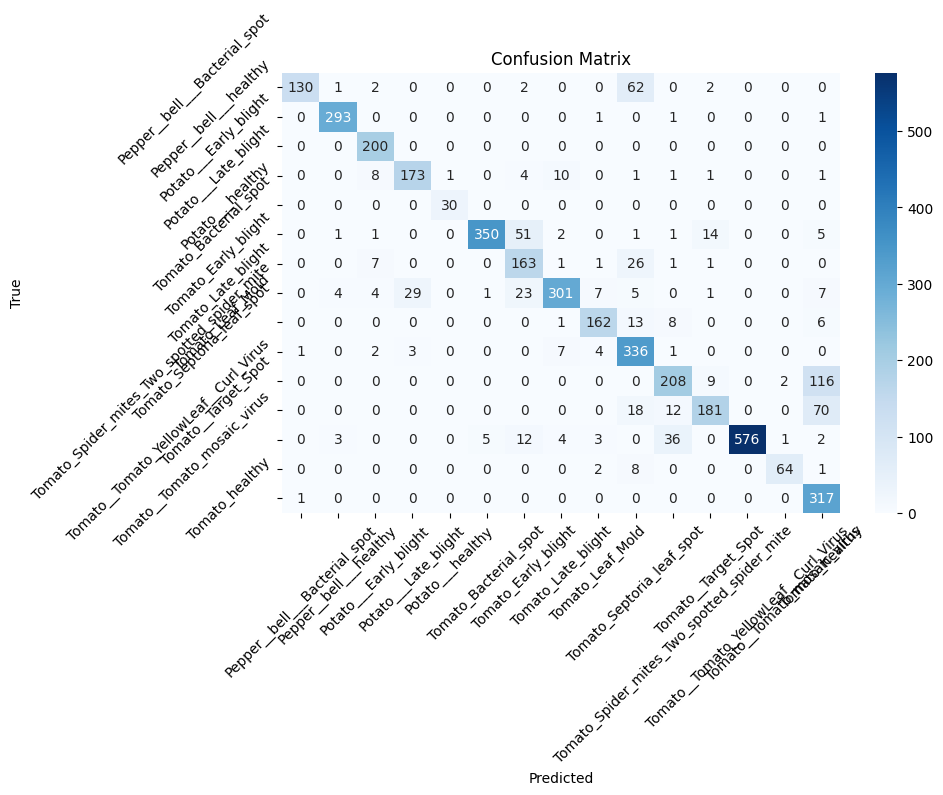

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

def plot_confusion_matrix(model, test_generator, class_names, save_path=None):
    """Generate and plot confusion matrix for the model."""
    # Get predictions and ground truths
    predictions = model.predict(test_generator)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Calculate confusion matrix
    cm = tf.math.confusion_matrix(true_classes, predicted_classes)

    # Convert tensor to numpy array
    cm = cm.numpy()

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()

    # Optionally save the plot
    if save_path:
        plt.savefig(f'{save_path}/confusion_matrix.png')

    plt.show()

# Example usage:
plot_confusion_matrix(model.model, test_generator, list(test_generator.class_indices.keys()), DRIVE_PATH)


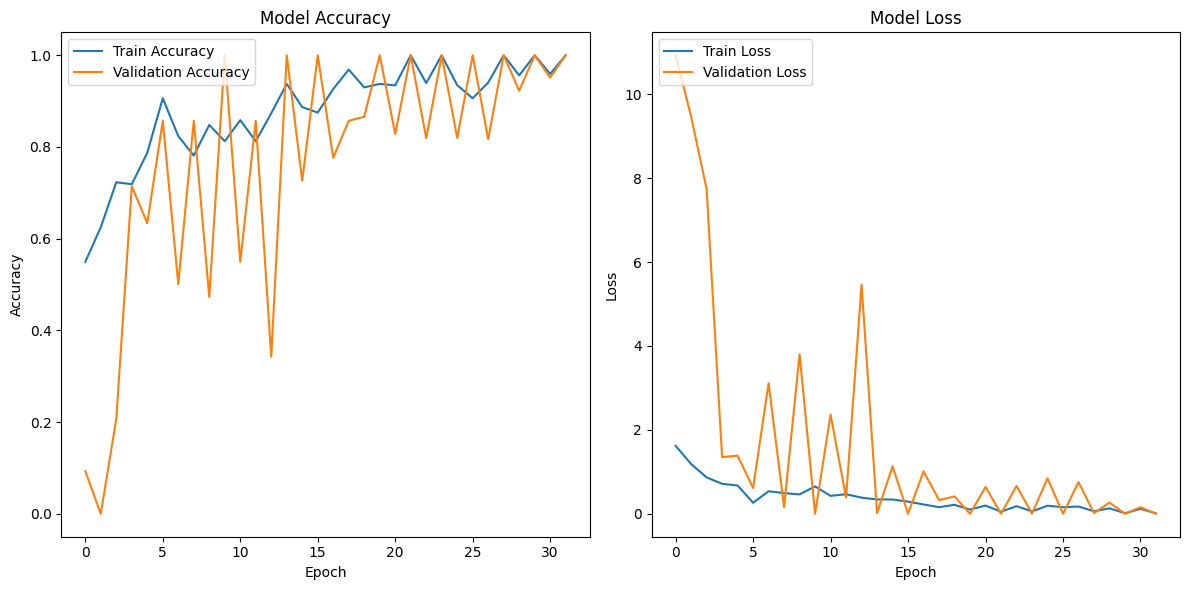

In [27]:
import matplotlib.pyplot as plt

# Assuming `history` contains the training history object from model.fit()
# Plotting accuracy
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
